# Tokenizer
Utilizamos un tokenizer preentrenado.

In [1]:
import tensorflow_datasets as tfds
import tensorflow_text as text
import tensorflow as tf

model_name = "ted_hrlr_translate_pt_en_converter"
tf.keras.utils.get_file(
    f"{model_name}.zip",
    f"http://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip",
    cache_dir='.', cache_subdir='', extract=True
)


'.\\ted_hrlr_translate_pt_en_converter.zip'

In [2]:
tokenizers = tf.saved_model.load(model_name)
print(tokenizers.en.get_vocab_size().numpy())
print(tokenizers.pt.get_vocab_size().numpy())

7010
7765


Ejemplo para tokenizar y decodificar:

In [3]:
example = "Attention AB 1890 Group Members! SAVE THE DATE! What: AB 1890 Annual Retreat When: November 13th, 14th, 15th Where: The Villagio Inn, Napa R.S.V.P. attendance ASAP! (More information to follow) See you there! Delaney Hunter Legislative Director Smith & Kemtpon"
example2 = "Here's what I sent. We can revise it as appropriate (for one thing I need to total up the dollars involved and fill in some blanks)."
encoded = tokenizers.en.tokenize([''])
print(encoded)
print(encoded.to_tensor(shape=[None, 10]))

encoded = tokenizers.en.tokenize([example])
for row in encoded.to_list():
    print(row)

encoded = tokenizers.en.tokenize(tf.constant([example, example2]))

for row in encoded.to_list():
    print(row)
print(type(encoded))
print(len(encoded.to_list()[0]))

<tf.RaggedTensor [[2, 3]]>
tf.Tensor([[2 3 0 0 0 0 0 0 0 0]], shape=(1, 10), dtype=int64)
[2, 951, 37, 684, 1207, 1374, 1010, 518, 1423, 4, 864, 71, 2021, 4, 90, 27, 37, 684, 1207, 1374, 1010, 111, 269, 1227, 105, 271, 966, 1224, 117, 27, 4734, 1395, 587, 13, 1850, 587, 13, 676, 587, 151, 27, 71, 58, 3902, 4826, 2973, 77, 269, 13, 5022, 4312, 54, 15, 55, 15, 58, 15, 52, 15, 102, 4587, 1282, 100, 4092, 4, 10, 121, 296, 73, 1098, 11, 125, 79, 96, 4, 2159, 3735, 1724, 6185, 3129, 1058, 2626, 2050, 3107, 5432, 8, 47, 4096, 271, 601, 485, 3]
[2, 951, 37, 684, 1207, 1374, 1010, 518, 1423, 4, 864, 71, 2021, 4, 90, 27, 37, 684, 1207, 1374, 1010, 111, 269, 1227, 105, 271, 966, 1224, 117, 27, 4734, 1395, 587, 13, 1850, 587, 13, 676, 587, 151, 27, 71, 58, 3902, 4826, 2973, 77, 269, 13, 5022, 4312, 54, 15, 55, 15, 58, 15, 52, 15, 102, 4587, 1282, 100, 4092, 4, 10, 121, 296, 73, 1098, 11, 125, 79, 96, 4, 2159, 3735, 1724, 6185, 3129, 1058, 2626, 2050, 3107, 5432, 8, 47, 4096, 271, 601, 485, 3]
[2, 

In [4]:
round_trip = tokenizers.en.detokenize(encoded)
for line in round_trip.numpy():
    print(line.decode('utf-8'))

attention ab 1890 group members ! save the date ! what : ab 1890 annual retreat when : november 13th , 14th , 15th where : the villagio inn , napa r . s . v . p . attendance asap ! ( more information to follow ) see you there ! delaney hunter legislative director smith & kemtpon
here ' s what i sent . we can revise it as appropriate ( for one thing i need to total up the dollars involved and fill in some blanks ) .


In [5]:
tokens = tokenizers.en.lookup(encoded)
tokens

<tf.RaggedTensor [[b'[START]', b'attention', b'a', b'##b', b'18', b'##9', b'##0', b'group', b'members', b'!', b'save', b'the', b'date', b'!', b'what', b':', b'a', b'##b', b'18', b'##9', b'##0', b'an', b'##n', b'##ual', b're', b'##t', b'##re', b'##at', b'when', b':', b'november', b'13', b'##th', b',', b'14', b'##th', b',', b'15', b'##th', b'where', b':', b'the', b'v', b'##ill', b'##ag', b'##io', b'in', b'##n', b',', b'na', b'##pa', b'r', b'.', b's', b'.', b'v', b'.', b'p', b'.', b'at', b'##tend', b'##ance', b'as', b'##ap', b'!', b'(', b'more', b'information', b'to', b'follow', b')', b'see', b'you', b'there', b'!', b'de', b'##lan', b'##ey', b'hunter', b'leg', b'##is', b'##la', b'##tive', b'director', b'smith', b'&', b'k', b'##em', b'##t', b'##p', b'##on', b'[END]'], [b'[START]', b'here', b"'", b's', b'what', b'i', b'sent', b'.', b'we', b'can', b're', b'##vise', b'it', b'as', b'appropriate', b'(', b'for', b'one', b'thing', b'i', b'need', b'to', b'total', b'up', b'the', b'dollars', b'invol

In [6]:
encoded.to_tensor(shape=[None, 94])

<tf.Tensor: shape=(2, 94), dtype=int64, numpy=
array([[   2,  951,   37,  684, 1207, 1374, 1010,  518, 1423,    4,  864,
          71, 2021,    4,   90,   27,   37,  684, 1207, 1374, 1010,  111,
         269, 1227,  105,  271,  966, 1224,  117,   27, 4734, 1395,  587,
          13, 1850,  587,   13,  676,  587,  151,   27,   71,   58, 3902,
        4826, 2973,   77,  269,   13, 5022, 4312,   54,   15,   55,   15,
          58,   15,   52,   15,  102, 4587, 1282,  100, 4092,    4,   10,
         121,  296,   73, 1098,   11,  125,   79,   96,    4, 2159, 3735,
        1724, 6185, 3129, 1058, 2626, 2050, 3107, 5432,    8,   47, 4096,
         271,  601,  485,    3,    0,    0],
       [   2,  137,    9,   55,   90,   45, 1249,   15,   78,   94,  105,
        4898,   76,  100, 4345,   10,   85,  103,  194,   45,  181,   73,
        1601,  130,   71,  443, 1260,   72, 3340,   77,  147, 4634,   88,
          11,   15,    3,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 

# Setup input pipeline
Primero necesitaremos una función que tokenice los pares InIts y cuerpo del mensaje:

In [7]:
LENGTH_SUBJECT = 20
LENGTH_VERB = 15
LENGTH_OBJECT = 10

def tokenize_pairs(inits, message):
    token_inits = []
    for init in inits:
        s = tokenizers.en.tokenize(init['Subject'])
        # Convert from ragged to dense, padding with zeros.
        s = s.to_tensor()

        v = tokenizers.en.tokenize(init['Verb'])
        # Convert from ragged to dense, padding with zeros.
        v = v.to_tensor()

        o = tokenizers.en.tokenize(init['Object'])
        # Convert from ragged to dense, padding with zeros.
        o = o.to_tensor()
        token_inits.append((s,v,o))

    msg = tokenizers.en.tokenize([message])
    # Convert from ragged to dense, padding with zeros.
    msg = msg.to_tensor()
    return token_inits, msg

tok = tokenize_pairs([{'Subject':['the', 'cat'], 'Verb':['has', 'taken'], 'Object' : ['the', 'ball', 'of', 'wool']},
               {'Subject':['we'], 'Verb':['will', 'take'], 'Object' : ['corrective', 'actions']}],
              'We should be more careful. The cat has taken the ball of wool. We will take corrective action')
tok

([(<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
   array([[   2,   71,    3],
          [   2, 2016,    3]], dtype=int64)>,
   <tf.Tensor: shape=(2, 3), dtype=int64, numpy=
   array([[  2, 144,   3],
          [  2, 703,   3]], dtype=int64)>,
   <tf.Tensor: shape=(4, 4), dtype=int64, numpy=
   array([[   2,   71,    3,    0],
          [   2, 1648,    3,    0],
          [   2,   74,    3,    0],
          [   2,  978, 2564,    3]], dtype=int64)>),
  (<tf.Tensor: shape=(1, 3), dtype=int64, numpy=array([[ 2, 78,  3]], dtype=int64)>,
   <tf.Tensor: shape=(2, 3), dtype=int64, numpy=
   array([[  2, 153,   3],
          [  2, 184,   3]], dtype=int64)>,
   <tf.Tensor: shape=(2, 4), dtype=int64, numpy=
   array([[   2, 2158,  555,    3],
          [   2, 2205,    3,    0]], dtype=int64)>)],
 <tf.Tensor: shape=(1, 24), dtype=int64, numpy=
 array([[   2,   78,  234,   97,  121, 2898,   15,   71, 2016,  144,  703,
           71, 1648,   74,  978, 2564,   15,   78,  153,  184, 2158,  555,
     

In [8]:
tokenizers.en.detokenize(tok[0][1][2])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'corrective', b'actions'], dtype=object)>

# Example set up

In [9]:
def ex_tokenize_pairs(pt, en):
    pt = tokenizers.pt.tokenize(pt)
    # Convert from ragged to dense, padding with zeros.
    pt = pt.to_tensor()

    en = tokenizers.en.tokenize(en)
    # Convert from ragged to dense, padding with zeros.
    en = en.to_tensor()
    return pt, en

def bad_tokenizer(l):
    return tokenizers.en.tokenize(l).to_tensor()

BUFFER_SIZE = 20000
BATCH_SIZE = 64

def bad_make_batches(ds, b_size = 3):
    return (
      ds
      .cache()
      .shuffle(BUFFER_SIZE)
      .map(bad_tokenizer, num_parallel_calls=tf.data.AUTOTUNE)
      .batch(b_size)
      .prefetch(tf.data.AUTOTUNE))

def first_make_batch(ds):
    return (
      ds
      .cache()
      .shuffle(BUFFER_SIZE)
      .batch(3))

def make_batches(ds):
    return (
      ds
      .cache()
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(ex_tokenize_pairs, num_parallel_calls=tf.data.AUTOTUNE)
      .prefetch(tf.data.AUTOTUNE))


In [10]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info=True,
                               as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

type(train_examples)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [11]:
print(examples)

{'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.string)>, 'validation': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.string)>, 'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.string)>}


In [12]:
dataset = tf.data.Dataset.from_tensor_slices(([1,2,3,4,5],[-1,-2,-3,-4,-5]))
#El primer parámetro determina los n primeros elementos para ir seleccionando las posiciones
print(dataset)
dataset = dataset.shuffle(7, reshuffle_each_iteration=True)

list(dataset.batch(3).as_numpy_iterator())

<TensorSliceDataset shapes: ((), ()), types: (tf.int32, tf.int32)>


[(array([1, 3, 5]), array([-1, -3, -5])), (array([2, 4]), array([-2, -4]))]

In [13]:
def gen_l(c, o='', n=5):
    return [f'{c}{i + 1}' + o for i in range(n)]

dataset = tf.data.Dataset.from_tensor_slices((gen_l('s', '1'), gen_l('v', '1'), gen_l('o', '1'),
                                              gen_l('s', '2'), gen_l('v', '2'), gen_l('o', '2'),
                                              gen_l('s', '3'), gen_l('v', '3'), gen_l('o', '3'),
                                              gen_l('s', '4'), gen_l('v', '4'), gen_l('o', '4'),
                                              gen_l('s', '5'), gen_l('v', '5'), gen_l('o', '5'),
                                              gen_l('s', '6'), gen_l('v', '6'), gen_l('o', '6'),gen_l('t')))
#El primer parámetro determina los n primeros elementos para ir seleccionando las posiciones
print(dataset)
dataset = dataset.shuffle(7, reshuffle_each_iteration=True)

list(dataset.batch(3).as_numpy_iterator())

<TensorSliceDataset shapes: ((), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ()), types: (tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string, tf.string)>


[(array([b's11', b's21', b's51'], dtype=object),
  array([b'v11', b'v21', b'v51'], dtype=object),
  array([b'o11', b'o21', b'o51'], dtype=object),
  array([b's12', b's22', b's52'], dtype=object),
  array([b'v12', b'v22', b'v52'], dtype=object),
  array([b'o12', b'o22', b'o52'], dtype=object),
  array([b's13', b's23', b's53'], dtype=object),
  array([b'v13', b'v23', b'v53'], dtype=object),
  array([b'o13', b'o23', b'o53'], dtype=object),
  array([b's14', b's24', b's54'], dtype=object),
  array([b'v14', b'v24', b'v54'], dtype=object),
  array([b'o14', b'o24', b'o54'], dtype=object),
  array([b's15', b's25', b's55'], dtype=object),
  array([b'v15', b'v25', b'v55'], dtype=object),
  array([b'o15', b'o25', b'o55'], dtype=object),
  array([b's16', b's26', b's56'], dtype=object),
  array([b'v16', b'v26', b'v56'], dtype=object),
  array([b'o16', b'o26', b'o56'], dtype=object),
  array([b't1', b't2', b't5'], dtype=object)),
 (array([b's41', b's31'], dtype=object),
  array([b'v41', b'v31'], dtyp

In [14]:
def gen_row(i):
    l = []
    for j in range(1, 7):
        for e, n in [('s', 2), ('v', 1), ('o', 3)]:
            for k in range(n):
                l.append(f"{e} {['a', 'b', 'c'][k]} {chr(ord('a') + i)} {chr(ord('a') + j)}")
    l.append(f't{i}')
    return l

dataset = tf.data.Dataset.from_tensor_slices([gen_row(i+1) for i in range(5)])
#El primer parámetro determina los n primeros elementos para ir seleccionando las posiciones
print(dataset)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.shuffle(7, reshuffle_each_iteration=True)
print(dataset.batch(3))
list(dataset.batch(3).as_numpy_iterator())

<TensorSliceDataset shapes: (37,), types: tf.string>
[array([b's a b b', b's b b b', b'v a b b', b'o a b b', b'o b b b',
       b'o c b b', b's a b c', b's b b c', b'v a b c', b'o a b c',
       b'o b b c', b'o c b c', b's a b d', b's b b d', b'v a b d',
       b'o a b d', b'o b b d', b'o c b d', b's a b e', b's b b e',
       b'v a b e', b'o a b e', b'o b b e', b'o c b e', b's a b f',
       b's b b f', b'v a b f', b'o a b f', b'o b b f', b'o c b f',
       b's a b g', b's b b g', b'v a b g', b'o a b g', b'o b b g',
       b'o c b g', b't1'], dtype=object), array([b's a c b', b's b c b', b'v a c b', b'o a c b', b'o b c b',
       b'o c c b', b's a c c', b's b c c', b'v a c c', b'o a c c',
       b'o b c c', b'o c c c', b's a c d', b's b c d', b'v a c d',
       b'o a c d', b'o b c d', b'o c c d', b's a c e', b's b c e',
       b'v a c e', b'o a c e', b'o b c e', b'o c c e', b's a c f',
       b's b c f', b'v a c f', b'o a c f', b'o b c f', b'o c c f',
       b's a c g', b's b c g', b'

[array([[b's a b b', b's b b b', b'v a b b', b'o a b b', b'o b b b',
         b'o c b b', b's a b c', b's b b c', b'v a b c', b'o a b c',
         b'o b b c', b'o c b c', b's a b d', b's b b d', b'v a b d',
         b'o a b d', b'o b b d', b'o c b d', b's a b e', b's b b e',
         b'v a b e', b'o a b e', b'o b b e', b'o c b e', b's a b f',
         b's b b f', b'v a b f', b'o a b f', b'o b b f', b'o c b f',
         b's a b g', b's b b g', b'v a b g', b'o a b g', b'o b b g',
         b'o c b g', b't1'],
        [b's a f b', b's b f b', b'v a f b', b'o a f b', b'o b f b',
         b'o c f b', b's a f c', b's b f c', b'v a f c', b'o a f c',
         b'o b f c', b'o c f c', b's a f d', b's b f d', b'v a f d',
         b'o a f d', b'o b f d', b'o c f d', b's a f e', b's b f e',
         b'v a f e', b'o a f e', b'o b f e', b'o c f e', b's a f f',
         b's b f f', b'v a f f', b'o a f f', b'o b f f', b'o c f f',
         b's a f g', b's b f g', b'v a f g', b'o a f g', b'o b f g',
     

In [15]:
dataset = tf.data.Dataset.from_tensor_slices([gen_row(i+1) for i in range(5)])
#El primer parámetro determina los n primeros elementos para ir seleccionando las posiciones
print(dataset)
bad_batches = bad_make_batches(dataset, 1)
print(bad_batches)
l = list(bad_batches.as_numpy_iterator())
print(len(l))
print(l[:2])

<TensorSliceDataset shapes: (37,), types: tf.string>
<PrefetchDataset shapes: (None, None, None), types: tf.int64>
5
[array([[[   2,   55,   37,   42,   38,    3],
        [   2,   55,   38,   42,   38,    3],
        [   2,   58,   37,   42,   38,    3],
        [   2,   51,   37,   42,   38,    3],
        [   2,   51,   38,   42,   38,    3],
        [   2,   51,   39,   42,   38,    3],
        [   2,   55,   37,   42,   39,    3],
        [   2,   55,   38,   42,   39,    3],
        [   2,   58,   37,   42,   39,    3],
        [   2,   51,   37,   42,   39,    3],
        [   2,   51,   38,   42,   39,    3],
        [   2,   51,   39,   42,   39,    3],
        [   2,   55,   37,   42,   40,    3],
        [   2,   55,   38,   42,   40,    3],
        [   2,   58,   37,   42,   40,    3],
        [   2,   51,   37,   42,   40,    3],
        [   2,   51,   38,   42,   40,    3],
        [   2,   51,   39,   42,   40,    3],
        [   2,   55,   37,   42,   41,    3],
        

In [16]:
dataset = tf.data.Dataset.from_tensor_slices([gen_row(i+1) for i in range(5)])
#El primer parámetro determina los n primeros elementos para ir seleccionando las posiciones
print(dataset)
bad_batches = bad_make_batches(dataset)
print(bad_batches)
l = list(bad_batches.as_numpy_iterator())
print(len(l))
print(l)

<TensorSliceDataset shapes: (37,), types: tf.string>
<PrefetchDataset shapes: (None, None, None), types: tf.int64>
2
[array([[[   2,   55,   37,   38,   38,    3],
        [   2,   55,   38,   38,   38,    3],
        [   2,   58,   37,   38,   38,    3],
        [   2,   51,   37,   38,   38,    3],
        [   2,   51,   38,   38,   38,    3],
        [   2,   51,   39,   38,   38,    3],
        [   2,   55,   37,   38,   39,    3],
        [   2,   55,   38,   38,   39,    3],
        [   2,   58,   37,   38,   39,    3],
        [   2,   51,   37,   38,   39,    3],
        [   2,   51,   38,   38,   39,    3],
        [   2,   51,   39,   38,   39,    3],
        [   2,   55,   37,   38,   40,    3],
        [   2,   55,   38,   38,   40,    3],
        [   2,   58,   37,   38,   40,    3],
        [   2,   51,   37,   38,   40,    3],
        [   2,   51,   38,   38,   40,    3],
        [   2,   51,   39,   38,   40,    3],
        [   2,   55,   37,   38,   41,    3],
        

In [17]:
def bad_make_batches2(ds):
    return (
      ds
      .cache()
      .shuffle(BUFFER_SIZE)
      .map(bad_tokenizer, num_parallel_calls=tf.data.AUTOTUNE)
      .prefetch(tf.data.AUTOTUNE))

dataset = tf.data.Dataset.from_tensor_slices([gen_row(i+1) for i in range(5)])
#El primer parámetro determina los n primeros elementos para ir seleccionando las posiciones
print(dataset)
bad_batches = bad_make_batches2(dataset)
print(bad_batches)
l = list(bad_batches.as_numpy_iterator())
print(len(l))
print(l)

<TensorSliceDataset shapes: (37,), types: tf.string>
<PrefetchDataset shapes: (None, None), types: tf.int64>
5
[array([[   2,   55,   37,   42,   38,    3],
       [   2,   55,   38,   42,   38,    3],
       [   2,   58,   37,   42,   38,    3],
       [   2,   51,   37,   42,   38,    3],
       [   2,   51,   38,   42,   38,    3],
       [   2,   51,   39,   42,   38,    3],
       [   2,   55,   37,   42,   39,    3],
       [   2,   55,   38,   42,   39,    3],
       [   2,   58,   37,   42,   39,    3],
       [   2,   51,   37,   42,   39,    3],
       [   2,   51,   38,   42,   39,    3],
       [   2,   51,   39,   42,   39,    3],
       [   2,   55,   37,   42,   40,    3],
       [   2,   55,   38,   42,   40,    3],
       [   2,   58,   37,   42,   40,    3],
       [   2,   51,   37,   42,   40,    3],
       [   2,   51,   38,   42,   40,    3],
       [   2,   51,   39,   42,   40,    3],
       [   2,   55,   37,   42,   41,    3],
       [   2,   55,   38,   42,  

In [52]:
def tokenizator(l):
    t = tokenizers.en.tokenize(l).to_tensor()
    return (tf.reshape(t[:-1], [-1]), t[-1])

def bad_make_batches3(ds):
    return (
      ds
      .cache()
      .shuffle(BUFFER_SIZE)
      .map(tokenizator, num_parallel_calls=tf.data.AUTOTUNE)
      .batch(2)
      .prefetch(tf.data.AUTOTUNE))

li = [gen_row(i+1) for i in range(5)]
dataset = tf.data.Dataset.from_tensor_slices(li)
del li
#El primer parámetro determina los n primeros elementos para ir seleccionando las posiciones
print(dataset)
print(dataset.cardinality().numpy())
bad_batches = bad_make_batches3(dataset)
print(bad_batches)
l = list(bad_batches.as_numpy_iterator())
print(bad_batches.cardinality().numpy())
print(len(l))
print(l)

<TensorSliceDataset shapes: (37,), types: tf.string>
5
<PrefetchDataset shapes: ((None, None), (None, None)), types: (tf.int64, tf.int64)>
3
3
[(array([[ 2, 55, 37, 40, 38,  3,  2, 55, 38, 40, 38,  3,  2, 58, 37, 40,
        38,  3,  2, 51, 37, 40, 38,  3,  2, 51, 38, 40, 38,  3,  2, 51,
        39, 40, 38,  3,  2, 55, 37, 40, 39,  3,  2, 55, 38, 40, 39,  3,
         2, 58, 37, 40, 39,  3,  2, 51, 37, 40, 39,  3,  2, 51, 38, 40,
        39,  3,  2, 51, 39, 40, 39,  3,  2, 55, 37, 40, 40,  3,  2, 55,
        38, 40, 40,  3,  2, 58, 37, 40, 40,  3,  2, 51, 37, 40, 40,  3,
         2, 51, 38, 40, 40,  3,  2, 51, 39, 40, 40,  3,  2, 55, 37, 40,
        41,  3,  2, 55, 38, 40, 41,  3,  2, 58, 37, 40, 41,  3,  2, 51,
        37, 40, 41,  3,  2, 51, 38, 40, 41,  3,  2, 51, 39, 40, 41,  3,
         2, 55, 37, 40, 42,  3,  2, 55, 38, 40, 42,  3,  2, 58, 37, 40,
        42,  3,  2, 51, 37, 40, 42,  3,  2, 51, 38, 40, 42,  3,  2, 51,
        39, 40, 42,  3,  2, 55, 37, 40, 43,  3,  2, 55, 38, 40,

In [19]:
tf.data.experimental.save(bad_batches, './save_test/')

In [20]:
bad_batches = tf.data.experimental.load('./save_test/')
print(bad_batches)
l = list(bad_batches.as_numpy_iterator())
print(len(l))
print(l)

<_LoadDataset shapes: ((None, None), (None, None)), types: (tf.int64, tf.int64)>
3
[(array([[ 2, 55, 37, 41, 38,  3,  2, 55, 38, 41, 38,  3,  2, 58, 37, 41,
        38,  3,  2, 51, 37, 41, 38,  3,  2, 51, 38, 41, 38,  3,  2, 51,
        39, 41, 38,  3,  2, 55, 37, 41, 39,  3,  2, 55, 38, 41, 39,  3,
         2, 58, 37, 41, 39,  3,  2, 51, 37, 41, 39,  3,  2, 51, 38, 41,
        39,  3,  2, 51, 39, 41, 39,  3,  2, 55, 37, 41, 40,  3,  2, 55,
        38, 41, 40,  3,  2, 58, 37, 41, 40,  3,  2, 51, 37, 41, 40,  3,
         2, 51, 38, 41, 40,  3,  2, 51, 39, 41, 40,  3,  2, 55, 37, 41,
        41,  3,  2, 55, 38, 41, 41,  3,  2, 58, 37, 41, 41,  3,  2, 51,
        37, 41, 41,  3,  2, 51, 38, 41, 41,  3,  2, 51, 39, 41, 41,  3,
         2, 55, 37, 41, 42,  3,  2, 55, 38, 41, 42,  3,  2, 58, 37, 41,
        42,  3,  2, 51, 37, 41, 42,  3,  2, 51, 38, 41, 42,  3,  2, 51,
        39, 41, 42,  3,  2, 55, 37, 41, 43,  3,  2, 55, 38, 41, 43,  3,
         2, 58, 37, 41, 43,  3,  2, 51, 37, 41, 43,

In [21]:
list(train_examples.take(3).as_numpy_iterator())
print(train_examples)

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.string)>


In [22]:
train_batches = first_make_batch(train_examples)
l = list(train_batches.as_numpy_iterator())
print(len(l))
print(l[:2])

17262
[(array([b'e est\xc3\xa3o a ser confeccionados das formas mais deliciosas .',
       b"`` ora , este \xc3\xa9 o mesmo adam smith que , 17 anos mais tarde , escreveria um pequeno livro chamado `` '' a riqueza das na\xc3\xa7\xc3\xb5es '' '' \xe2\x80\x94 o documento fundador da economia . ''",
       b'nessa altura , foi apenas a fa\xc3\xadsca de uma ideia .'],
      dtype=object), array([b"and they 're being made in the most wonderful ways .",
       b"`` now this is the same adam smith who , 17 years later , would write a little book called `` '' the wealth of nations '' '' \xe2\x80\x94 the founding document of economics . ''",
       b'it was at that point , just the spark of an idea .'],
      dtype=object)), (array([b'ent\xc3\xa3o , o planeamento de resposta no s\xc3\xa9culo vinte e um \xc3\xa9 poss\xc3\xadvel e tamb\xc3\xa9m \xc3\xa9 essencial .',
       b'um dos an\xc3\xbancios da ind\xc3\xbastria do carv\xc3\xa3o na \xc3\xa9poca do natal foi o seguinte .',
       b'us\xc3\xa

In [23]:
print(train_examples)
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)
print(train_batches)
l = list(train_batches.as_numpy_iterator())
print(len(l))
print(l[:2])

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.string)>
<PrefetchDataset shapes: ((None, None), (None, None)), types: (tf.int64, tf.int64)>
810
[(array([[  2,  39,  39, ...,   0,   0,   0],
       [  2,  88,  44, ...,   0,   0,   0],
       [  2,  88,  54, ...,   0,   0,   0],
       ...,
       [  2, 103, 744, ...,   0,   0,   0],
       [  2, 108, 583, ...,   0,   0,   0],
       [  2, 100, 142, ...,   0,   0,   0]], dtype=int64), array([[  2, 117,  79, ...,   0,   0,   0],
       [  2,  76,   9, ...,   0,   0,   0],
       [  2,  45,  91, ...,   0,   0,   0],
       ...,
       [  2, 110,  13, ...,   0,   0,   0],
       [  2,  82,  81, ...,   0,   0,   0],
       [  2, 482,  99, ...,   0,   0,   0]], dtype=int64)), (array([[   2,  120,   85, ...,    0,    0,    0],
       [   2, 5131,  319, ...,    0,    0,    0],
       [   2,   85,  187, ...,    0,    0,    0],
       ...,
       [   2,   39,   39, ...,    0,    0,    0],
       [   2,  122,   54, ...,    0,    0,    0]

# Position embedding

Para que el transformer tenga en cuenta la posición de cada palabra, es necesario calcular los [vectores de codificación posicional](https://www.youtube.com/watch?v=dichIcUZfOw). Implementemos su cálculo:

In [24]:
import numpy as np

def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)


# Masking
Enmascaramos todos los tokens de relleno con la primera función (se obtiene un 1 en donde se encuentren y un 0 en caso contrario). La segunda genera una máscara de predicción, es decir, indica que para predecir el segundo token solo debe usarse el primero. Para ello produce una matrix triangular superior con 0 en la diagonal.

In [25]:
def create_padding_mask(seq):
    #tf.math.equal(seq, 0) genera una matriz cuyo valor es True en aquellas posiciones en que en la matriz seq
    #sea 0
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

    # add extra dimensions to add the padding
    # to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

def create_look_ahead_mask(size):
    #Produce una matriz triangular superior con la diagonal nula
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)


# Producto escalar de atención
Para implementar la arquitectura transformer es necesario utilizar la fórmula del [producto escalar de atención](https://www.youtube.com/watch?v=mMa2PmYJlCo):

In [26]:
def scaled_dot_product_attention(q, k, v, mask):
    """
    Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead)
    but it must be broadcastable for addition.

    Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable
          to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
    output, attention_weights
    """

    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # add the mask to the scaled tensor.
    if mask is not None:
        #La idea de multiplicar la máscara por -1e9 (infinito negativo) es luego al pasarlo por la función
        #softmax se obtenga el valor 0 en estas posiciones del vector
        scaled_attention_logits += (mask * -1e9)

    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

# Multi-head attention

Implementamos el modelo de atención:

In [27]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads = 8):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        if d_model % self.num_heads != 0:
            raise ValueError("MutilHeadAttention: dimension of the model must be a multiple of the number of heads.")

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        """
        Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        # El -1 permite ajustar esa dimensión en función del nº de elementos
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)

        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

        return output, attention_weights

In [28]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
print(y)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

tf.Tensor(
[[[0.9203881  0.86875725 0.17757976 ... 0.74866164 0.17869365 0.8598305 ]
  [0.89917386 0.02581131 0.04312754 ... 0.8769504  0.85391784 0.40402937]
  [0.22640431 0.12835097 0.8253164  ... 0.35835552 0.01738381 0.7351848 ]
  ...
  [0.39145565 0.8043041  0.8042283  ... 0.3424486  0.8928033  0.500561  ]
  [0.5837436  0.60191214 0.638535   ... 0.03918517 0.04287899 0.8385978 ]
  [0.48036265 0.7935188  0.6060002  ... 0.11286104 0.773556   0.7830714 ]]], shape=(1, 60, 512), dtype=float32)


(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

# Point wise feed forward network

In [29]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
    ])

# Encoded Layer

In [30]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        #dff = dimension feed forward, dimensión de la capa interna
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

In [31]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

# Decoded Layer

In [32]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)

        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2

In [33]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output,
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

# Encoder

In [34]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                   maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding,
                                                self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        # adding embedding and position encoding.
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x  # (batch_size, input_seq_len, d_model)


In [35]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print(sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)


(64, 62, 512)


# Decoder

In [36]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                 look_ahead_mask, padding_mask)
            attention_weights[f'decoder_layer{i+1}_block1'] = block1
            attention_weights[f'decoder_layer{i+1}_block2'] = block2

        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [37]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input,
                              enc_output=sample_encoder_output,
                              training=False,
                              look_ahead_mask=None,
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

# Transformer

In [38]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, rate=0.1):
        super().__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                                 input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                               target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inputs, training):
        # Keras models prefer if you pass all your inputs in the first argument
        inp, tar = inputs

        enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)

        enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights

    def create_masks(self, inp, tar):
        # Encoder padding mask
        enc_padding_mask = create_padding_mask(inp)

        # Used in the 2nd attention block in the decoder.
        # This padding mask is used to mask the encoder outputs.
        dec_padding_mask = create_padding_mask(inp)

        # Used in the 1st attention block in the decoder.
        # It is used to pad and mask future tokens in the input received by
        # the decoder.
        look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
        dec_target_padding_mask = create_padding_mask(tar)
        look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

        return enc_padding_mask, look_ahead_mask, dec_padding_mask

In [39]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048,
    input_vocab_size=8500, target_vocab_size=8000,
    pe_input=10000, pe_target=6000)

temp_input = tf.random.uniform((256, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((256, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer([temp_input, temp_target], training=False)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)


TensorShape([256, 36, 8000])

# Optimizer

In [40]:
num_layers = 4 #6
d_model = 128 #512
dff = 512 #2048
num_heads = 8
dropout_rate = 0.1

In [41]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [42]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

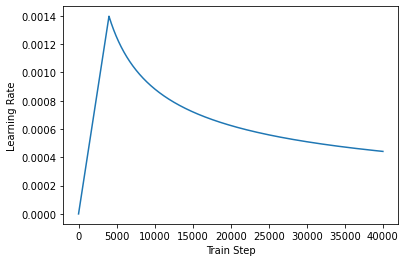

In [43]:
import matplotlib.pyplot as plt

temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

# Loss and metrics

In [44]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [45]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
    accuracies = tf.equal(real, tf.argmax(pred, axis=2))

    mask = tf.math.logical_not(tf.math.equal(real, 0))
    accuracies = tf.math.logical_and(mask, accuracies)

    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [46]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [1]:
import tensorflow as tf

dss = tf.data.experimental.load("dss")
dss

<_LoadDataset shapes: (3,), types: tf.string>